In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dir_path = "/content/drive/My Drive/Colab Notebooks/Data Science Task"

#Data Exploration

In [ ]:
df_train = pd.read_csv(os.path.join(dir_path , "2016-09-19_79351_training.csv"))

In [ ]:
df_train.head()

,user_id,transaction_date,transaction_type,mcc_group,amount_n26_currency,dataset_transaction,dataset_user
0,a78884f5e76951188c1e719d4956773a,2016-02-01,DT,NaN,350,training,training
1,b0333294fef6ff1299102a70ad46b126,2016-02-01,DT,NaN,202,training,training
2,7b8d2a2780adae0cd0c248e92c1b28dc,2016-02-01,DT,NaN,291,training,training
3,cc4abaa500f7db4390ae3f02bd36d805,2016-02-01,DT,NaN,214,training,training
4,49b99d1d5ba028566639e8b3eb7c055b,2016-02-01,DT,NaN,272,training,training


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408546 entries, 0 to 408545
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              408546 non-null  object 
 1   transaction_date     408546 non-null  object 
 2   transaction_type     408546 non-null  object 
 3   mcc_group            258324 non-null  float64
 4   amount_n26_currency  408546 non-null  int64  
 5   dataset_transaction  408546 non-null  object 
 6   dataset_user         408546 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 21.8+ MB


In [ ]:
df_train.shape

(408546, 7)

In [ ]:
df_train.nunique()

user_id                10000
transaction_date         182
transaction_type           9
mcc_group                 17
amount_n26_currency     1127
dataset_transaction        1
dataset_user               1
dtype: int64

In [ ]:
df_train.transaction_type.value_counts()

PT     258324
CT      63837
DT      40528
DD      29869
FT       6528
DR       4727
BBU      3561
BUB       942
TUB       230
Name: transaction_type, dtype: int64

In [ ]:
df_train.mcc_group.value_counts()

1.0     69807
2.0     50586
6.0     24672
3.0     20875
8.0     20610
4.0     20194
17.0    11466
16.0    11150
7.0     10888
10.0     7282
11.0     5803
5.0      3337
12.0      873
15.0      329
9.0       287
13.0      141
14.0       24
Name: mcc_group, dtype: int64

In [ ]:
df_train.isna().sum()

user_id                     0
transaction_date            0
transaction_type            0
mcc_group              150222
amount_n26_currency         0
dataset_transaction         0
dataset_user                0
dtype: int64



---



In [ ]:
df_mcc_groups = pd.read_csv(os.path.join(dir_path , "mcc_group_definition.csv"))

In [ ]:
df_mcc_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mcc_group    17 non-null     int64 
 1   explanation  17 non-null     object
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


In [ ]:
df_mcc_groups

,mcc_group,explanation
0,1,ATM
1,2,Groceries
2,3,Gastronomie
3,4,Shopping/(Fashion)
4,5,"Home and DIY, House Energy"
5,6,Travel/Hotel
6,7,Transport
7,8,Automotive/Gas
8,9,Family/Babies/Children
9,10,Entertainment/Leisure




---



In [ ]:
df_trans_types = pd.read_csv(os.path.join(dir_path , "transaction_types.csv"))

In [ ]:
df_trans_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         23 non-null     object
 1   explanation  23 non-null     object
 2   direction    23 non-null     object
 3   agent        23 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes


In [ ]:
df_trans_types

,type,explanation,direction,agent
0,AR,Authorization reject,-,Card
1,AE,Authorization expired,In,Card
2,AV,Authorization Reversal,In,Card
3,BBU,Cash26 deposit,In,Partner
4,CT,Credit Transfer,In,Bank Account
5,DI,Dispute,In,Card
6,DR,Debit Reversal,In,Bank Account
7,PF,Credit Card refund by merchant,In,Card
8,PR,Presentment Reversal,In,Card
9,WU,Referral payment,In,Number26




---



#Data Preprocessing

In [ ]:
df_merged = pd.DataFrame()

In [ ]:
# Convert transaction_date to DateTime format:
df_train['transaction_date'] = pd.to_datetime(df_train['transaction_date'])

In [ ]:
# Merging Dataframes
df_merged = pd.merge(df_train, df_trans_types, left_on='transaction_type', right_on='type', how='left')

In [ ]:
# Drop the redundant column ('type' from df_trans_types in this case):
df_merged.drop('type', axis=1, inplace=True)

In [ ]:
df_merged.head()

,user_id,transaction_date,transaction_type,mcc_group,amount_n26_currency,dataset_transaction,dataset_user,explanation,direction,agent
0,a78884f5e76951188c1e719d4956773a,2016-02-01,DT,NaN,350,training,training,Debit Transfer,Out,Bank Account
1,b0333294fef6ff1299102a70ad46b126,2016-02-01,DT,NaN,202,training,training,Debit Transfer,Out,Bank Account
2,7b8d2a2780adae0cd0c248e92c1b28dc,2016-02-01,DT,NaN,291,training,training,Debit Transfer,Out,Bank Account
3,cc4abaa500f7db4390ae3f02bd36d805,2016-02-01,DT,NaN,214,training,training,Debit Transfer,Out,Bank Account
4,49b99d1d5ba028566639e8b3eb7c055b,2016-02-01,DT,NaN,272,training,training,Debit Transfer,Out,Bank Account


In [ ]:
missing_values = df_merged.isnull().sum()
print(missing_values)

user_id                     0
transaction_date            0
transaction_type            0
mcc_group              150222
amount_n26_currency         0
dataset_transaction         0
dataset_user                0
explanation                 0
direction                   0
agent                       0
dtype: int64


In [ ]:
df_merged.rename(columns={'explanation': 'explanation_trans_type'}, inplace=True)

In [ ]:
# Convert 'mcc_group' column in the dataframes to object (if it's an int64)
df_mcc_groups['mcc_group'] = df_mcc_groups['mcc_group'].astype(float)

In [ ]:
# Merge
df_merged = pd.merge(df_merged, df_mcc_groups, on='mcc_group', how='left')
df_merged.rename(columns={'explanation': 'explanation_mcc_group'}, inplace=True)

In [ ]:
# Handle Missing Values
df_merged.fillna('Unknown', inplace=True)

In [ ]:
df_merged.head()

,user_id,transaction_date,transaction_type,mcc_group,amount_n26_currency,dataset_transaction,dataset_user,explanation_trans_type,direction,agent,explanation_mcc_group
0,a78884f5e76951188c1e719d4956773a,2016-02-01,DT,Unknown,350,training,training,Debit Transfer,Out,Bank Account,Unknown
1,b0333294fef6ff1299102a70ad46b126,2016-02-01,DT,Unknown,202,training,training,Debit Transfer,Out,Bank Account,Unknown
2,7b8d2a2780adae0cd0c248e92c1b28dc,2016-02-01,DT,Unknown,291,training,training,Debit Transfer,Out,Bank Account,Unknown
3,cc4abaa500f7db4390ae3f02bd36d805,2016-02-01,DT,Unknown,214,training,training,Debit Transfer,Out,Bank Account,Unknown
4,49b99d1d5ba028566639e8b3eb7c055b,2016-02-01,DT,Unknown,272,training,training,Debit Transfer,Out,Bank Account,Unknown


In [ ]:
# Remove
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408546 entries, 0 to 408545
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   user_id                 408546 non-null  object        
 1   transaction_date        408546 non-null  datetime64[ns]
 2   transaction_type        408546 non-null  object        
 3   mcc_group               408546 non-null  object        
 4   amount_n26_currency     408546 non-null  int64         
 5   dataset_transaction     408546 non-null  object        
 6   dataset_user            408546 non-null  object        
 7   explanation_trans_type  408546 non-null  object        
 8   direction               408546 non-null  object        
 9   agent                   408546 non-null  object        
 10  explanation_mcc_group   408546 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 37.4+ MB


In [ ]:
# Remove
df_merged.describe()

,amount_n26_currency
count,408546.000000
mean,52.764164
std,111.870681
min,3.000000
25%,7.000000
50%,17.000000
75%,38.000000
max,1166.000000


#Feature Engineering

In [ ]:
# Date-related Features
# df_merged['transaction_year'] = df_merged['transaction_date'].dt.year
# df_merged['transaction_month'] = df_merged['transaction_date'].dt.month
# df_merged['transaction_day'] = df_merged['transaction_date'].dt.day
df_merged['transaction_weekday'] = df_merged['transaction_date'].dt.weekday

In [ ]:
# Transaction Frequency: This will provide insights into how frequently a user conducts a transaction, which might be a significant predictor for forecasting.
df_merged['transaction_frequency'] = df_merged.groupby('user_id')['transaction_date'].transform('count')

In [ ]:
# Cumulative Transaction Amount: The cumulative sum of transactions can provide insights into a user's spending habits over time.
df_merged['cumulative_amount'] = df_merged.groupby('user_id')['amount_n26_currency'].cumsum()

In [ ]:
# Rolling Average Amount: Calculate the rolling average of the transaction amounts for a specific window. It helps capture trends in the user's spending or income behavior.
# df_merged['rolling_avg_amount'] = df_merged.groupby('user_id')['amount_n26_currency'].rolling(window=7).mean().reset_index(0, drop=True)

In [ ]:
# Days Since Last Transaction: Calculate the days passed since the last transaction for each user. It can provide insights into user activity.
df_merged['transaction_date'] = pd.to_datetime(df_merged['transaction_date'])
df_merged['days_since_last_transaction'] = df_merged.groupby('user_id')['transaction_date'].diff().dt.days
df_merged['days_since_last_transaction'].fillna(0, inplace=True)

In [ ]:
# Is_weekend: A binary column indicating if the transaction took place on a weekend.
df_merged['is_weekend'] = df_merged['transaction_weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [ ]:
df_merged.transaction_month.unique()

array([2, 3, 4, 5, 6, 7])

In [ ]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_merged, columns=['mcc_group', 'transaction_type', 'direction', 'transaction_month', 'transaction_day', 'transaction_weekday'], drop_first=True)

In [ ]:
# Remove redundant columns that will not be part of predictive modeling
df_encoded.drop(['transaction_date',  'dataset_transaction', 'dataset_user', 'explanation_trans_type',  'explanation_mcc_group', 'transaction_year', 'agent'], axis=1, inplace=True)

In [ ]:
df_encoded.head()

,user_id,amount_n26_currency,transaction_frequency,cumulative_amount,days_since_last_transaction,is_weekend,mcc_group_2.0,mcc_group_3.0,mcc_group_4.0,mcc_group_5.0,...,transaction_day_28,transaction_day_29,transaction_day_30,transaction_day_31,transaction_weekday_1,transaction_weekday_2,transaction_weekday_3,transaction_weekday_4,transaction_weekday_5,transaction_weekday_6
0,a78884f5e76951188c1e719d4956773a,350,157,350,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,b0333294fef6ff1299102a70ad46b126,202,95,202,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7b8d2a2780adae0cd0c248e92c1b28dc,291,118,291,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,cc4abaa500f7db4390ae3f02bd36d805,214,85,214,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49b99d1d5ba028566639e8b3eb7c055b,272,29,272,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Note:** For Visualizations purpose, we will use 'df_merged' dataframe, and  '**df_encoded**' will be used for predictive modeling.

In [ ]:
df_encoded.info()

###Final Data Exploration

In [ ]:
df_merged.head()

,user_id,transaction_date,transaction_type,mcc_group,amount_n26_currency,dataset_transaction,dataset_user,explanation_trans_type,direction,agent,explanation_mcc_group,transaction_year,transaction_month,transaction_day,transaction_weekday,transaction_frequency,cumulative_amount,days_since_last_transaction,is_weekend
0,a78884f5e76951188c1e719d4956773a,2016-02-01,DT,Unknown,350,training,training,Debit Transfer,Out,Bank Account,Unknown,2016,2,1,0,157,350,0.0,0
1,b0333294fef6ff1299102a70ad46b126,2016-02-01,DT,Unknown,202,training,training,Debit Transfer,Out,Bank Account,Unknown,2016,2,1,0,95,202,0.0,0
2,7b8d2a2780adae0cd0c248e92c1b28dc,2016-02-01,DT,Unknown,291,training,training,Debit Transfer,Out,Bank Account,Unknown,2016,2,1,0,118,291,0.0,0
3,cc4abaa500f7db4390ae3f02bd36d805,2016-02-01,DT,Unknown,214,training,training,Debit Transfer,Out,Bank Account,Unknown,2016,2,1,0,85,214,0.0,0
4,49b99d1d5ba028566639e8b3eb7c055b,2016-02-01,DT,Unknown,272,training,training,Debit Transfer,Out,Bank Account,Unknown,2016,2,1,0,29,272,0.0,0


In [ ]:
df_merged.isnull().sum()

user_id                        0
transaction_date               0
transaction_type               0
mcc_group                      0
amount_n26_currency            0
dataset_transaction            0
dataset_user                   0
explanation_trans_type         0
direction                      0
agent                          0
explanation_mcc_group          0
transaction_year               0
transaction_month              0
transaction_day                0
transaction_weekday            0
transaction_frequency          0
cumulative_amount              0
days_since_last_transaction    0
is_weekend                     0
dtype: int64

In [ ]:
df_merged.nunique()

user_id                        10000
transaction_date                 182
transaction_type                   9
mcc_group                         18
amount_n26_currency             1127
dataset_transaction                1
dataset_user                       1
explanation_trans_type             9
direction                          2
agent                              3
explanation_mcc_group             18
transaction_year                   1
transaction_month                  6
transaction_day                   31
transaction_weekday                7
transaction_frequency            273
cumulative_amount              17262
rolling_avg_amount              2950
days_since_last_transaction      191
is_weekend                         2
dtype: int64

In [ ]:
# Remove
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408546 entries, 0 to 408545
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   user_id                      408546 non-null  object        
 1   transaction_date             408546 non-null  datetime64[ns]
 2   transaction_type             408546 non-null  object        
 3   mcc_group                    408546 non-null  object        
 4   amount_n26_currency          408546 non-null  int64         
 5   dataset_transaction          408546 non-null  object        
 6   dataset_user                 408546 non-null  object        
 7   explanation_trans_type       408546 non-null  object        
 8   direction                    408546 non-null  object        
 9   agent                        408546 non-null  object        
 10  explanation_mcc_group        408546 non-null  object        
 11  transaction_year          

In [ ]:
# Remove
df_merged.describe()

,amount_n26_currency,transaction_year,transaction_month,transaction_day,transaction_weekday,transaction_frequency,cumulative_amount,rolling_avg_amount,days_since_last_transaction,is_weekend
count,408546.000000,408546.0,408546.000000,408546.000000,408546.000000,408546.000000,408546.000000,354949.000000,408546.000000,408546.000000
mean,52.764164,2016.0,4.580488,15.188576,2.822537,94.253709,2558.783016,52.063131,3.098890,0.206704
std,111.870681,0.0,1.685362,9.098015,1.804642,67.179796,3132.631602,53.016853,8.774819,0.404942
min,3.000000,2016.0,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,-30.000000,0.000000
25%,7.000000,2016.0,3.000000,7.000000,1.000000,44.000000,517.000000,17.857143,0.000000,0.000000
50%,17.000000,2016.0,5.000000,15.000000,3.000000,81.000000,1480.000000,33.285714,1.000000,0.000000
75%,38.000000,2016.0,6.000000,23.000000,4.000000,129.000000,3462.000000,66.285714,4.000000,0.000000
max,1166.000000,2016.0,7.000000,31.000000,6.000000,483.000000,37244.000000,847.714286,171.000000,1.000000




---



In [ ]:
df_filtered = df_merged[(~pd.isna(df_merged['mcc_group'])) & (df_merged['mcc_group'] != 'Unknown')]

In [ ]:
# Check the values of some features when mcc_group is Unknown
columns_to_check = ['transaction_type', 'explanation_trans_type', 'direction', 'agent', 'transaction_month', 'transaction_weekday']  # Add any other columns you want to check

for col in columns_to_check:
    unique_values = df_filtered[col].unique()
    print(f"Unique values for {col}: ", unique_values)
    # print(unique_values)
    # print("\n" + "-"*50 + "\n")


Unique values for transaction_type:  ['PT']
Unique values for explanation_trans_type:  ['Presentment']
Unique values for direction:  ['Out']
Unique values for agent:  ['Card']
Unique values for transaction_month:  [2 3 4 5 6 7]
Unique values for transaction_weekday:  [0 1 2 3 4 5 6]


In [ ]:
# Confirming for 'In' and 'mcc_group'
df_merged[df_merged['direction']=='In']['mcc_group'].unique()

array([nan])

**Observations:**

* It can be observed that the value 'In' for the feature 'direction' exist only when 'mcc_group' is unknown. And, so we will not drop these missing values (mcc_group=NaN) but will keep it as a feature when we will do predicitve modeling.

* Similalry, mcc_group is having a valid value only when transaction_type is 'PT'(Presentment), or if 'agent' is 'card'.

In [ ]:
# monthly_aggregates = df_merged.groupby(['user_id', 'month']).agg(
#     total_expense=pd.NamedAgg(column='amount_n26_currency', aggfunc='sum')
# ).reset_index()


In [ ]:
# # Step 1: Create a DataFrame of users and their earliest transaction dates
# df_merged1 = df_merged.copy()
# earliest_transactions = df_merged1.groupby('user_id')['transaction_date'].min().reset_index()
# earliest_transactions.rename(columns={'transaction_date': 'earliest_transaction_date'}, inplace=True)

# # Step 2: Merge this DataFrame with the main DataFrame
# df_with_earliest = df_merged1.merge(earliest_transactions, on='user_id', how='left')

# # Step 3: Check for rows where "rolling_avg_amount" is missing AND the transaction date is the same as the earliest transaction date
# missing_rolling_avg_at_start = df_with_earliest[(df_with_earliest['rolling_avg_amount'].isna()) & (df_with_earliest['transaction_date'] == df_with_earliest['earliest_transaction_date'])]

# print(f"Number of missing rolling_avg_amount values at the start of a user's transaction history: {len(missing_rolling_avg_at_start)}")


Number of missing rolling_avg_amount values at the start of a user's transaction history: 12726


#Visualizations

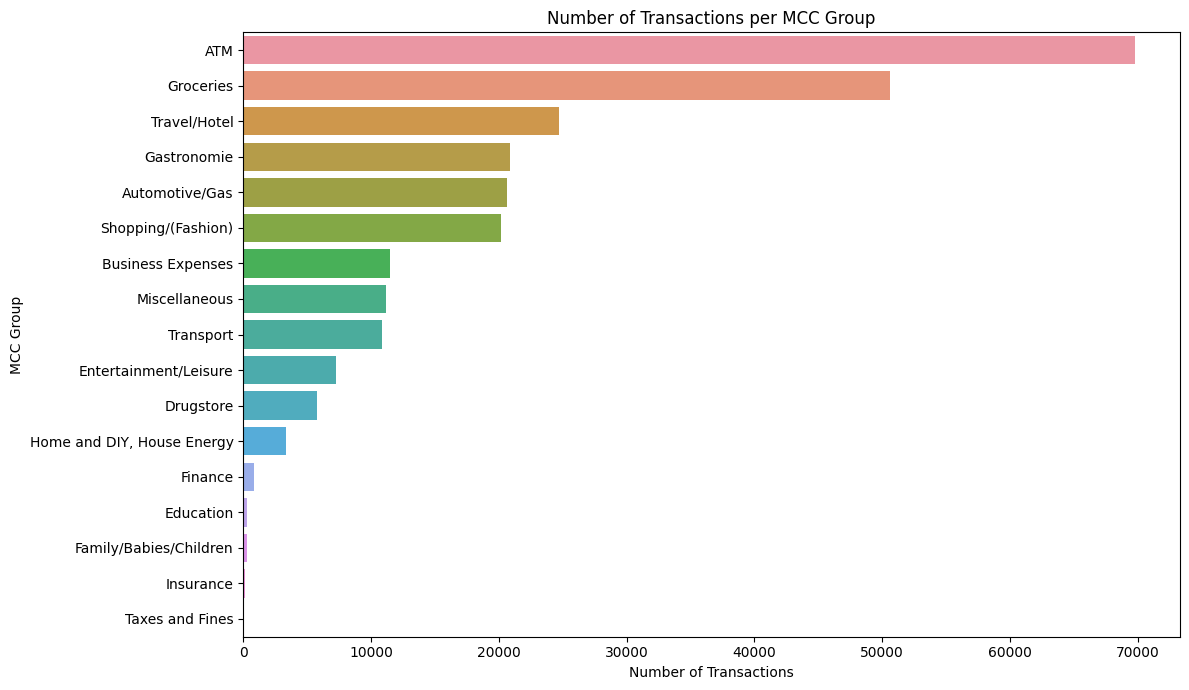

In [ ]:
# Distribution of Transactions per MCC Group

plt.figure(figsize=(12, 7))
sns.countplot(y='explanation_mcc_group', data=df_merged, order=df_merged['explanation_mcc_group'].value_counts().index)
plt.title('Number of Transactions per MCC Group')
plt.xlabel('Number of Transactions')
plt.ylabel('MCC Group')
plt.tight_layout()
plt.show()


**Observations:**

* ATM transactions dominate, suggesting that many users prefer withdrawing cash. This might be an area for banks to investigate why users prefer cash over digital transactions for specific MCC Groups. Could there be a benefit or incentive for cash transactions?
* Groceries, Travel/Hotel, and Gastronomie are also quite popular, hinting at daily necessities and leisure activities.
* Categories like Taxes and Fines, Insurance, and Family/Babies/Children have lower transaction counts. This could either mean they aren't frequent expenses or that users prefer other methods or platforms for these transactions.

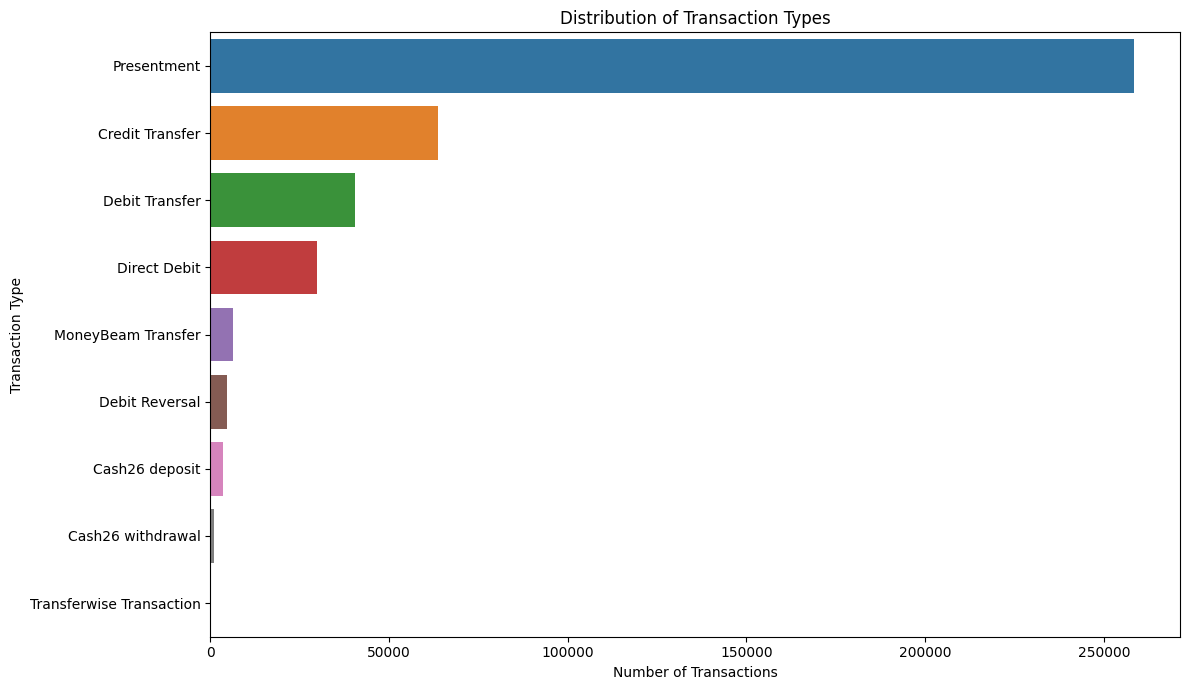

In [ ]:
# Transaction Types Distribution
plt.figure(figsize=(12, 7))
sns.countplot(y='explanation_trans_type', data=df_merged, order=df_merged['explanation_trans_type'].value_counts().index)  # Assuming 'explanation_x' after merging
plt.title('Distribution of Transaction Types')
plt.xlabel('Number of Transactions')
plt.ylabel('Transaction Type')
plt.tight_layout()
plt.show()


**Observations:**

* The "Presentment" transaction type has the highest number of transactions, greatly surpassing the other types.
* "Credit Transfer" and "Debit Transfer" follow, but are considerably less in number compared to "Presentment".
* The rest of the transaction types like "Direct Debit", "MoneyBeam Transfer", "Debit Reversal", "Cash26 deposit", "Cash26 withdrawal", and "Transferwise Transaction" have significantly fewer occurrences.

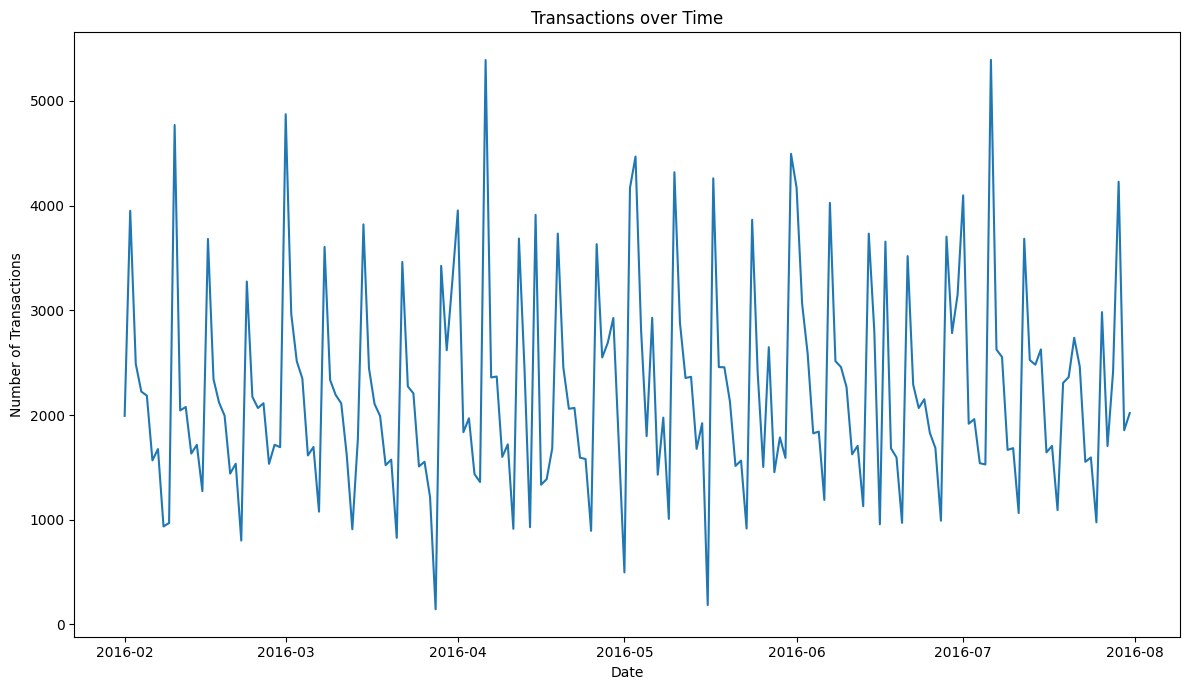

In [ ]:
# Distribution of Transactions over Time
df_merged['transaction_date'] = pd.to_datetime(df_merged['transaction_date'])
df_date_count = df_merged.groupby('transaction_date').size().reset_index(name='counts')

plt.figure(figsize=(12, 7))
sns.lineplot(x='transaction_date', y='counts', data=df_date_count)
plt.title('Transactions over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()


**Observations:**

Initially, there seems to be a slight upward trend in transactions from February to early April. However, the trend becomes somewhat inconsistent in the following months with periods of decline and rise.

1. **Local Peaks**: There are several noticeable peaks, especially in late April and early June, suggesting specific days or periods with higher transaction counts.

2. **Low Points**: The graph also indicates periods with a noticeable drop in transactions, notably in mid-April and late June.